In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("books.csv",index_col=0)

In [3]:
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
df.columns = df.columns.str.strip()
df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')

In [5]:
books = df[["ratings_count","text_reviews_count"]]
books.head()

,ratings_count,text_reviews_count
bookID,,
1,2095690,27591
2,2153167,29221
4,6333,244
5,2339585,36325
8,41428,164


<Axes: xlabel='ratings_count', ylabel='text_reviews_count'>

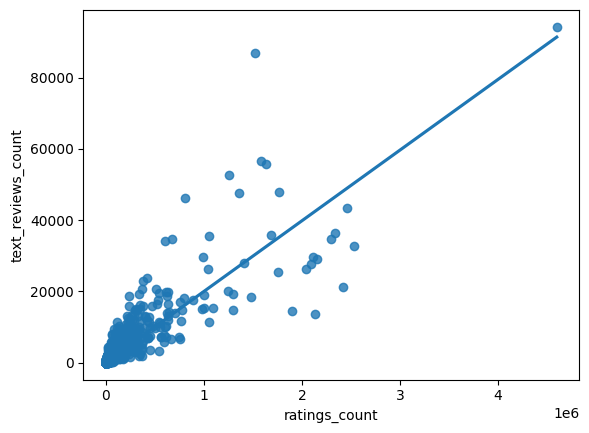

In [6]:
sns.regplot(data=books,x="ratings_count",y="text_reviews_count",ci=None)

In [28]:
mdl_rate_review = ols("text_reviews_count ~ ratings_count",data=books_new).fit()


In [29]:
mdl_rate_review.params

Intercept        28.008007
ratings_count     0.033136
dtype: float64

In [34]:
explanatory_data = pd.DataFrame({"ratings_count":np.arange(10000,6000,50)})
explanatory_data

,ratings_count


In [35]:
mdl_rate_review.predict(explanatory_data)

Series([], dtype: float64)

In [36]:
pridicted_data = explanatory_data.assign(text_reviews_count =mdl_rate_review.predict(explanatory_data) )
pridicted_data.head()

,ratings_count,text_reviews_count


<Axes: xlabel='ratings_count', ylabel='text_reviews_count'>

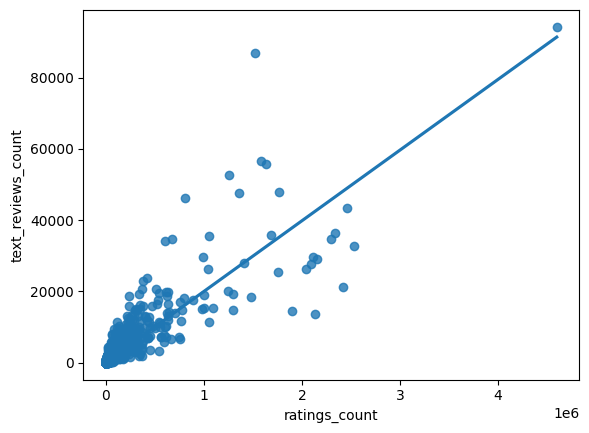

In [37]:
fig = plt.figure()
sns.regplot(data=books,x="ratings_count",y="text_reviews_count",ci=None)
sns.scatterplot(data=pridicted_data,x="ratings_count",y="text_reviews_count",color='red',markers='X')

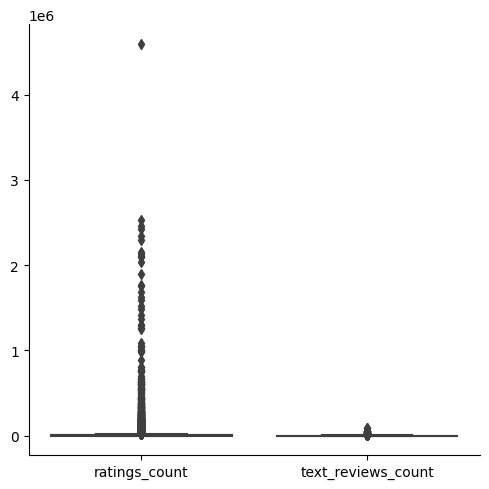

In [20]:
sns.catplot(data=books,kind='box')

In [21]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.75)

IQR = Q2 - Q2

C:\Users\I355833\AppData\Local\Temp\ipykernel_8216\3873059363.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\I355833\AppData\Local\Temp\ipykernel_8216\3873059363.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q2 = df.quantile(0.75)


In [22]:
threshold = 1.5 * IQR

In [23]:
lower = Q1 - threshold*IQR
upper = Q2 - threshold*IQR

In [24]:
books_new = books[~((books < lower) | (books > upper)).any(axis=1)]

C:\Users\I355833\AppData\Local\Temp\ipykernel_8216\697942228.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  books_new = books[~((books < lower) | (books > upper)).any(axis=1)]
C:\Users\I355833\AppData\Local\Temp\ipykernel_8216\697942228.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  books_new = books[~((books < lower) | (books > upper)).any(axis=1)]


In [25]:
books_new.head()

,ratings_count,text_reviews_count
bookID,,
18,2877,195
23,2088,131
31,1710,91
35,1618,140
45,1430,59


In [41]:
mdl_rate_review_new = ols("text_reviews_count ~ ratings_count",data=books_new).fit()

In [46]:
explanatory_data = pd.DataFrame({"ratings_count":np.arange(100,6000,10)})
explanatory_data

,ratings_count
0,100
1,110
2,120
3,130
4,140
...,...
585,5950
586,5960
587,5970
588,5980


In [47]:
pridicted_data = explanatory_data.assign(text_reviews_count =mdl_rate_review.predict(explanatory_data) )
pridicted_data.head()

,ratings_count,text_reviews_count
0,100,31.321620
1,110,31.652982
2,120,31.984343
3,130,32.315704
4,140,32.647066


In [48]:
pridicted_data.head()

,ratings_count,text_reviews_count
0,100,31.321620
1,110,31.652982
2,120,31.984343
3,130,32.315704
4,140,32.647066


<Axes: xlabel='ratings_count', ylabel='text_reviews_count'>

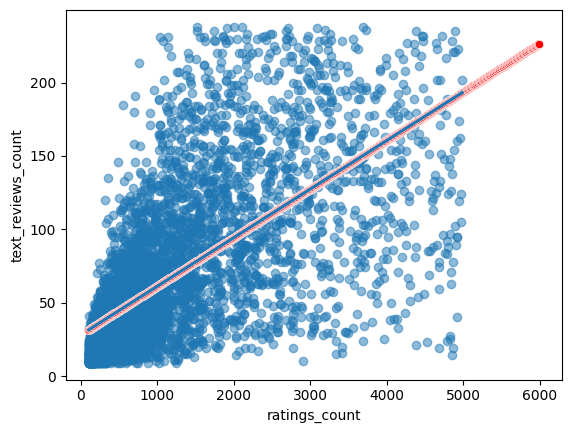

In [50]:
sns.regplot(data=books_new,x="ratings_count",y="text_reviews_count",ci=None,scatter_kws={'alpha':0.5})
sns.scatterplot(data=pridicted_data,x="ratings_count",y="text_reviews_count",color="red",markers='x')

In [51]:
explanatory_data = pd.DataFrame({"ratings_count":[7000]})
explanatory_data

,ratings_count
0,7000


In [52]:
mdl_rate_review_new.predict(explanatory_data)

0    259.960962
dtype: float64